# 最简单最实用：线性回归

### 线性回归
* 在解决连续变量的预测问题里，线性回归最简单
* 对于很多问题，在一定范围内是有效的
* 理论和应用也是最完善的

### 今日提纲
1. 为什么要使用线性回归
2. 如何计算线性回归？
3. 由最小二乘法选出的直线有没有用？
4. 线性回归参数估计的含义
5. 线性回归对数据的解释
6. 线性回归对样本及误差的要求和假设前提
7. 预测的confidence interval 和 prediction interval
8. 动动手

### 1. 为什么要使用线性回归？

* $y=c_0+c_1 x_1+c_2 x_2$
* 形式简单
* 应用广泛：身高与体重，海拔与气压
<img src='hw.png',width=500>
* 普通最小二乘法理解容易，计算起来简单
* 结果也很容易解释
* 奥卡姆剃刀指南：如果没有足够的证据（理由），就不用更复杂的模型
> In my opinion the theory here is the logically simplest relativistic field theory that is at all possible.  But this does not mean that Nature might not obey a more complex theory.  More complex theories have frequently been proposed. . .  In my view, such more complicated systems and their combinations should be considered only if there exist physical-empirical reasons to do so.               -Einstein

### 2. 如何计算线性回归？最小二乘法


* 世界不是完美的，要接纳不完美
* 需要通过量化的形式来比较
<img src='pm.png',width=500>


\begin{equation*}
\hat{y}_{黄} = c_0 + c_1 x \\
\hat{y}_{红} = d_0 + d_1 x
\end{equation*}

<img src='all_score.png',width=500>
* 每个观测值是$x_i,y_i$
* $x_i$是自变量，回归的值是$\hat{y}_i$
* 样本的回归是对总体的回归的估计
\begin{equation*}
\hat{y}_i = \hat{\alpha} + \hat{\beta} x_i \\
y_i = \alpha + \beta x_i \\
\end{equation*}

<img src='regression_y_mean.png',width=700>


* 单个点的拟合程度用**残差**来衡量：
\begin{equation*}
\epsilon_i = y_i - \hat{y}_i
\end{equation*}


* 整体的拟合程度，用**残差平方和（SSE）**来衡量：
\begin{equation*}
sum\ of\ square\ error = \sum_i \epsilon_i^2 \\
= \sum_i (y_i - \hat{y}_i)^2 \\
= \sum_i (y_i - \hat{\alpha} - \hat{\beta} x_i )^2\\
\end{equation*}

#### 选出拟合程度最好的直线
* 残差平方和最小的直线
* 根据极值条件求 $\alpha,\beta$
\begin{equation*}
\hat{\beta} = \frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sum(x_i-\bar{x})^2}\\
\hat{\alpha} = \bar{y}-\hat{\beta}\bar{x}
\end{equation*}
* 推导

### 3. 由最小二乘法选出的直线有没有用？
* 恭喜入坑，选出一根直线只是万里长征第一步
* 不管是什么样的数据，都可以计算出一根这样的直线
* 需要用其他标准来衡量，这跟直线，对解释数据到底有没有用

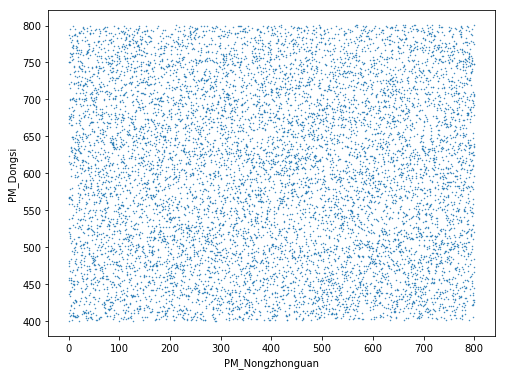

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0,800,10000)
np.random.seed(1)
y = 400+np.random.random(10000)*400+x*0.002

plt.figure(figsize=[8,6])
plt.scatter(x,y,s=0.2)

plt.xlabel('PM_Nongzhonguan')
plt.ylabel('PM_Dongsi')

intercept = 600.891491, slope = -0.002232


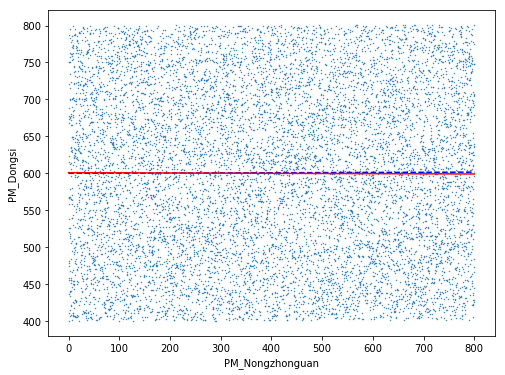

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x.reshape(-1,1),y)
y_hat = lr.predict(x.reshape(-1,1))

print('intercept = %f, slope = %f'%(lr.intercept_,lr.coef_))

plt.figure(figsize=[8,6])
plt.scatter(x,y,s=0.2)
plt.plot(x,600+x*0.002,'--',c='blue')
plt.plot(x,y_hat,c='red')
plt.xlabel('PM_Nongzhonguan')
plt.ylabel('PM_Dongsi')

(400, 800)

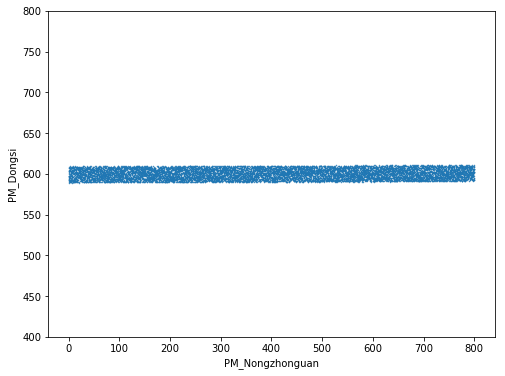

In [25]:
y_1_random = (y-x*0.002)
y_2 = np.mean(y_1_random) + x * 0.002 + (y_1_random-np.mean(y_1_random))/400*20

plt.figure(figsize=[8,6])
plt.scatter(x,y_2,s=0.2)
plt.xlabel('PM_Nongzhonguan')
plt.ylabel('PM_Dongsi')
plt.ylim([400,800])


intercept = 599.283220, slope = 0.001788


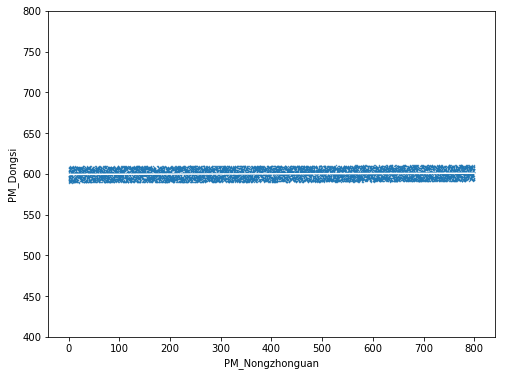

In [30]:
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
lr2.fit(x.reshape(-1,1),y_2)
y_hat_2 = lr2.predict(x.reshape(-1,1))
plt.figure(figsize=[8,6])
plt.scatter(x,y_2,s=0.2)
plt.plot(x,y_hat_2,c='white')
plt.xlabel('PM_Nongzhonguan')
plt.ylabel('PM_Dongsi')
plt.ylim([400,800])
print('intercept = %f, slope = %f'%(lr2.intercept_,lr2.coef_))

left intercept = 600.891491, slope = -0.002232
right intercept = 599.283220, slope = 0.001788


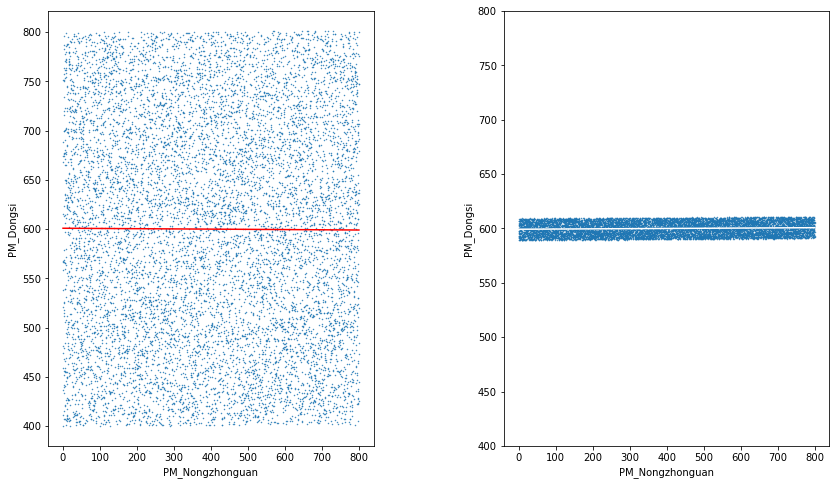

In [31]:
fig = plt.figure(figsize=(14,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplot(1,2,1)
plt.scatter(x,y,s=0.2)
plt.plot(x,y_hat,c='red')
plt.xlabel('PM_Nongzhonguan')
plt.ylabel('PM_Dongsi')

plt.subplot(1,2,2)
plt.scatter(x,y_2,s=0.2)
plt.plot(x,y_hat_2,c='white')
plt.xlabel('PM_Nongzhonguan')
plt.ylabel('PM_Dongsi')
plt.ylim([400,800])
print('left intercept = %f, slope = %f'%(lr.intercept_,lr.coef_))
print('right intercept = %f, slope = %f'%(lr2.intercept_,lr2.coef_))


In [32]:
x = np.linspace(0,800,10000)
np.random.seed(2)
y3 = 400+np.random.random(10000)*400+x*0.002

lr3 = LinearRegression()
lr3.fit(x.reshape(-1,1),y3)
y_hat_3 = lr3.predict(x.reshape(-1,1))

y_3_random = (y3-x*0.002)
y_4 = np.mean(y_3_random) + x * 0.002 + (y_3_random-np.mean(y_3_random))/400*20
lr4 = LinearRegression()
lr4.fit(x.reshape(-1,1),y_4)
y_hat_4 = lr4.predict(x.reshape(-1,1))
print('left intercept = %f, slope = %f'%(lr3.intercept_,lr3.coef_))
print('right intercept = %f, slope = %f'%(lr4.intercept_,lr4.coef_))

left intercept = 597.434210, slope = 0.002158
right intercept = 597.494287, slope = 0.002008


In [33]:
x = np.linspace(0,800,10000)
np.random.seed(3)
y3 = 400+np.random.random(10000)*400+x*0.002

lr3 = LinearRegression()
lr3.fit(x.reshape(-1,1),y3)
y_hat_3 = lr3.predict(x.reshape(-1,1))

y_3_random = (y3-x*0.002)
y_4 = np.mean(y_3_random) + x * 0.002 + (y_3_random-np.mean(y_3_random))/400*20
lr4 = LinearRegression()
lr4.fit(x.reshape(-1,1),y_4)
y_hat_4 = lr4.predict(x.reshape(-1,1))
print('left intercept = %f, slope = %f'%(lr3.intercept_,lr3.coef_))
print('right intercept = %f, slope = %f'%(lr4.intercept_,lr4.coef_))

left intercept = 599.686570, slope = -0.000431
right intercept = 598.762664, slope = 0.001878


In [75]:
def coeff_lr(i):
    x = np.linspace(0,800,10000)
    np.random.seed(i)
    y3 = 400+np.random.random(10000)*400+x*0.002

    lr3 = LinearRegression()
    lr3.fit(x.reshape(-1,1),y3)
    y_hat_3 = lr3.predict(x.reshape(-1,1))

    y_3_random = (y3-x*0.002)
    y_4 = np.mean(y_3_random) + x * 0.002 + (y_3_random-np.mean(y_3_random))/400*20
    lr4 = LinearRegression()
    lr4.fit(x.reshape(-1,1),y_4)
    y_hat_4 = lr4.predict(x.reshape(-1,1))
    #print('left intercept = %f, slope = %f'%(lr3.intercept_,lr3.coef_))
    #print('right intercept = %f, slope = %f'%(lr4.intercept_,lr4.coef_))
    
    return pd.DataFrame([[0,lr3.coef_],[1,lr4.coef_]],columns=['cate','coef_'])

result = coeff_lr(0)
for i in range(1,100):
    df = coeff_lr(i)
    result = result.append(df,ignore_index=True)



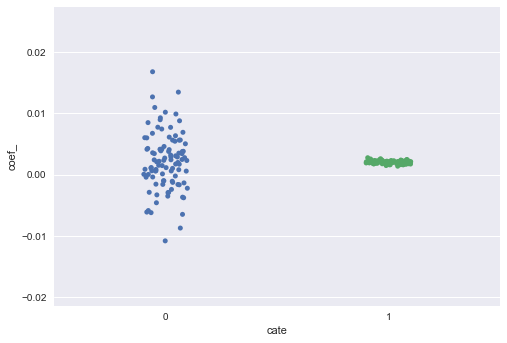

In [78]:
import seaborn as sns
sns.stripplot(x="cate", y="coef_", data=result,jitter=True);


## 要点 

* 每次回归是对**某一次抽样**的样本进行回归分析
* 对样本回归计算后的斜率是个变量，随抽样结果不同而不同

### 需要进一步使用其他指标来衡量线性回归的效用，达到建模与分析的目的
* 回归分析的<span style="color:blue">目的</span>是什么？
    * 去估计总体的x与总体的y之间的关系，是正相关？负相关？还是不相关？（这一层面，在于与‘不相关‘比较）
    * 相关性会不会随不同的抽样情景变化？会不会出现：第一次抽样的回归结果是正相关，第二次抽样的回归结果是负相关？
    * 确定了相关性，那么线性回归模型能不能很好的解释原有数据的特点？

### 4. 线性回归的参数估计分析

#### 以斜率为例
* 斜率的符号与相关性
\begin{equation*}
\hat{\beta} = \frac{Cov(x,y)}{Var(x)} \\
= \frac{Cov(x,y)}{\sqrt{Var(x) }\sqrt{Var(x)} }\\
= \frac{Cov(x,y)}{\sqrt{Var(x) }\sqrt{Var(y)}}\frac{\sqrt{Var(y)}} {\sqrt{Var(x)} }\\
={Corr(x,y)}\frac{\sqrt{Var(y)}}{\sqrt{Var(x)}}
\end{equation*}

* 在假设检验的框架下，衡量回归参数符号的**不确定性**
* $\hat{\beta}$随样本变化而变化，是总体回归参数$\beta$的估计量，具有均值和方差
\begin{equation*}
\hat{\beta} = \frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sum(x_i-\bar{x})^2}\\
= \frac{\sum(x_i-\bar{x})y_i}{\sum(x_i-\bar{x})^2}\\
E(\hat{\beta})=\frac{\sum(x_i-\bar{x})E(y_i)}{\sum(x_i-\bar{x})^2}\\
=\frac{\sum(x_i-\bar{x})(\alpha+\beta x_i)}{\sum(x_i-\bar{x})^2}\\
=\beta
\end{equation*}

\begin{equation*}
Var(\hat{\beta}) = \sum[\frac{(x_i-\bar{x})}{\sum(x_i-\bar{x})^2}]^2Var(y_i)
=\frac{\sigma^2}{\sum(x_i-\bar{x})^2}
\end{equation*}
<img src='compare_0.png',width=500>


* 用t检验来判断，0在回归参数分布的位置，以判断参数正负符号的不确定性

* t检验：
    * 原假设， H0: $\beta = 0$
    * 备择假设,H1: $\beta \neq 0$
    * $\hat{\beta} \sim N(\beta,\frac{\sigma^2}{\sum(x_i-x)^2}$)
    * 构造统计量
        * $t = \frac{\hat{\beta}}{\sqrt{\hat{\sigma}^2/\sum(x_i-x)^2}}$
        * 其中 $\hat{\sigma}^2 = \frac{1}{n-1}\sum e_i^2 = \frac{1}{n-1}\sum(y_i-\hat{y_i})^2$
        * [无偏估计量参考资料](./OLSMATRIXpart2.pdf)
    * 计算对应的p值，判断是否拒绝原假设



<img src='compare_t_test.png',width=400>

* 如何解释显著性？（我的理解应解释为相关性的确定程度）


### 5. 线性回归对数据的解释
* 回归分析的<span style="color:blue">目的</span>是什么？
    * 去估计总体的x与总体的y之间的关系，是正相关？负相关？还是不相关？（这一层面，在于与‘不相关‘比较）
    * 相关性会不会随不同的抽样情景变化？会不会出现：第一次抽样的回归结果是正相关，第二次抽样的回归结果是负相关？
    * 确定了相关性，那么线性回归模型能不能很好的解释原有数据的特点？

<img src='SSESSRSST.png',width=700>

\begin{equation*}
R^2 = \frac{SSR}{SST}=1-\frac{SSE}{SST}
\end{equation*}

* $R^2$含义：离差平方和中有多少能被回归平方和解释

* 注意事项：
    * $r^2=0$不代表自变量与因变量没有关系
<img src='caution_1_plot.gif',width=300>
    * $r^2$大也不代表自变量和因变量就一定是线性关系
<img src='caution_2_plot.gif',width=400>
    * $r^2$大也不代表结果显著（与确定性无关）


### 6. 线性回归对样本及误差的要求和假设前提


<img src='regression_y_mean.png',width=700>

### 要求：
1. y的均值是x的线性组合
2. 残差$e_i$独立于x
3. 给定x, 残差$e_i$要服从正态分布
4. 对于不同的xi, 残差$e_i$的方差variance应相同

* <span style='color:blue'>L</span>inear Function
* <span style='color:blue'>I</span>ndependent
* <span style='color:blue'>N</span>ormal Distribution
* <span style='color:blue'>E</span>qual Variance

### 7. 预测的confidence interval 和 prediction interval


* 问题1：年级与某成人考试分数，根据抽样样本，估计二年级学生的平均分数
<img src='sample1.png',width=700>
<img src='sample2.png',width=700>
* 不同次的抽样，回归结果是不一样的




* 预测二年级的学生平均分数 vs 预测某个学生的考试分数
<img src='confidence_interval.png',width=800>

Confidential Interval

<img src='Confidential.png',width=800>

Prediction Interval

<img src='Prediction.png',width=800>

### 8. 动动手
